# 전국 신규 민간 아파트 분양가격 동향
* 2015년 10월부터 2018년 6월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do
* 이 튜토리얼은 아파트 분양가에 대한 분석보다 파이썬 데이터 분석 방법을 배우는데 목적을 두고 있습니다.
* 이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 다음의 판다스 10분 완성 문서를 참고해 주시면 좋습니다. 
    * https://dataitgirls2.github.io/10minutes2pandas/
* 또 시각화 도구로는 grammer of graphics 문법을 활용할 수 있는 plotnine을 사용합니다.
* 이 튜토리얼은 데잇걸즈 2기와 파이콘 한국 2018에서 진행되기도 했습니다.

## [A Grammar of Graphics for Python — plotnine](http://plotnine.readthedocs.io/en/stable/index.html)
* [tutorial](http://plotnine.readthedocs.io/en/stable/tutorials.html)
* [ggplot2-cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* 이미지 출처 : [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional…](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

<img src="https://cdn-images-1.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png">

In [1]:
# 시각화 도구 설치
# !pip install plotnine==0.5.0
# 판다스 버전 지정
# !pip install --upgrade pandas==0.23.4
# !pip install statsmodels -U

In [2]:
# !pip install missingno

In [3]:
# ! pip install --upgrade Cython
# ! pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import statsmodels.api as sm
from plotnine import *
import plotnine

In [19]:
import pandas as pd
import numpy as np
import re

In [20]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [21]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [22]:
pre_sale = pd.read_csv('./data/전국_평균_분양가격_2018.6월_.csv', encoding='euc-kr')
pre_sale.shape

(2805, 5)

In [23]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


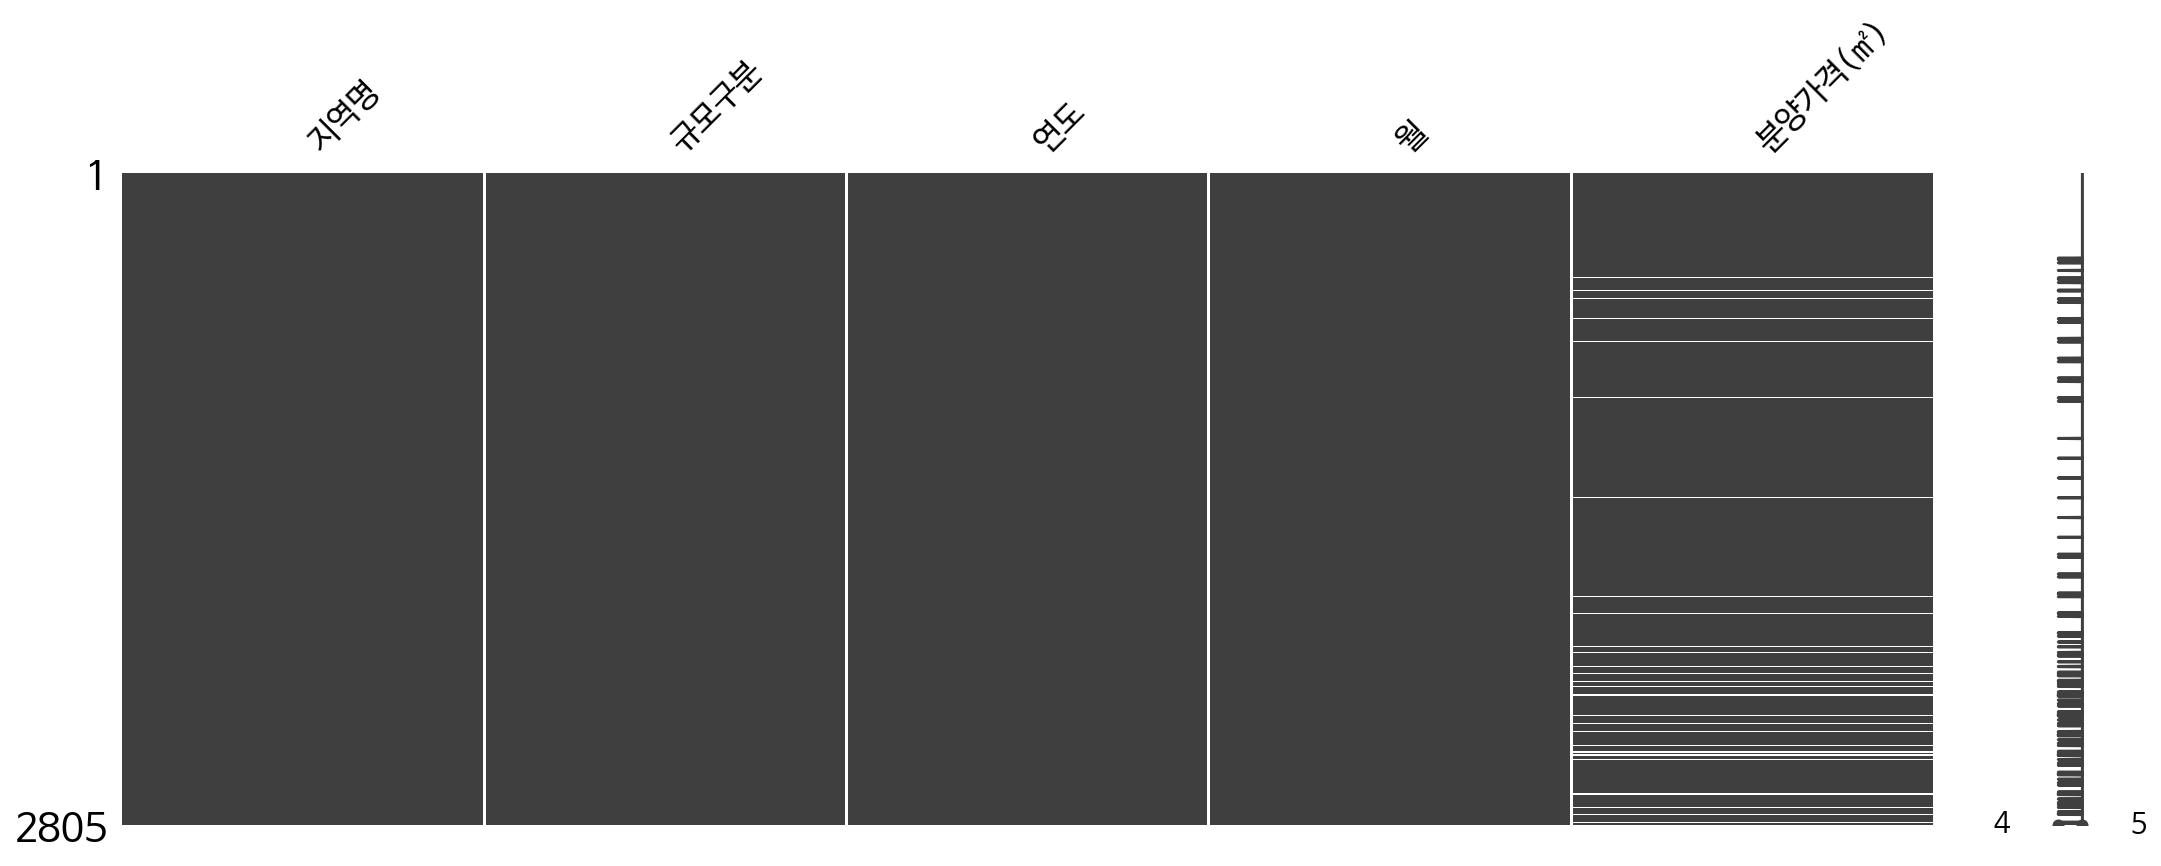

In [24]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [25]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
dtype: int64

In [12]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [26]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [27]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [28]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [29]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [30]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [31]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null object
월          2805 non-null object
분양가격(㎡)    2674 non-null object
분양가격       2582 non-null float64
평당분양가격     2582 non-null float64
dtypes: float64(2), object(5)
memory usage: 153.5+ KB


In [32]:
# 분양가격에 결측치가 많이 있어요.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

In [33]:
pre_sale.describe()

,분양가격,평당분양가격
count,2582.000000,2582.000000
mean,3056.522851,10086.525407
std,1110.111932,3663.369377
min,1868.000000,6164.400000
25%,2339.000000,7718.700000
50%,2738.500000,9037.050000
75%,3289.000000,10853.700000
max,8098.000000,26723.400000


In [13]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [22]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 102㎡초과          561
전용면적 85㎡초과 102㎡이하    561
전용면적 60㎡이하           561
전용면적 60㎡초과 85㎡이하     561
전체                   561
Name: 규모구분, dtype: int64

# 전국평균 분양가격

In [14]:
# 숫자를 읽기 쉽게 하기 위해 지정
pd.options.display.float_format = '{:,.0f}'.format
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    456
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,199
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,470
       50%    2,516  2,672  2,849  2,912
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    456
       mean   9,203  9,683 10,360 10,888
       std    3,224  3,536  3,655  3,958
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,153
       50%    8,303  8,818  9,402  9,611
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

## 규모별 전국 평균 분양가격

In [ ]:
? pre_sale.pivot_table

In [24]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,260"
전용면적 60㎡이하,"8,952","9,399","10,246","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,457"
전체,"8,893","9,293","9,901","10,560"


# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [35]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()

In [36]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('''2015년부터 2018년까지 분양가는 계속 상승했으며, 
      상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'''.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year.head()

# https://www.data.go.kr/dataset/3035522/fileData.do
# region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)

2015년부터 2018년까지 분양가는 계속 상승했으며, 
      상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,335,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 387,000원이다.
전국 평균 변동액은 평당 1,666,647원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,7159.9,7011.125,7126.8,7642.80,482
1,경기,10377.4,11220.000,11850.0,12854.05,2476
2,경남,7585.6,7847.950,8119.8,8894.05,1308
3,경북,7170.9,7360.650,7794.9,8261.55,1090
4,광주,8052.0,8898.725,9463.5,9629.95,1577


# 연도별 변동 그래프

In [ ]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(fontproperties=font),
         figure_size=(8, 4))
)

## 지역별 평당 분양가격 합계
* 아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지를 봅니다.
* 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있습니다.

In [ ]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

## 규모별 

In [ ]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(fontproperties=font),
         figure_size=(8, 4))
)

In [ ]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(fontproperties=font),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

In [ ]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(fontproperties=font),
         figure_size=(12, 6))
)

In [ ]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(fontproperties=font))
)

In [ ]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(fontproperties=font))
)

In [ ]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(fontproperties=font))
)

In [159]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


# 2013년 12월~2015년 9월 3.3㎡당 분양가격
* 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.

In [160]:
df = pd.read_csv('./data/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0)
df.shape

(23, 27)

In [129]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [161]:
year = df.iloc[0]
month = df.iloc[1]

In [162]:
# 결측치를 채워준다.
year.head()

Unnamed: 0       구분
Unnamed: 1      NaN
Unnamed: 2    2013년
Unnamed: 3    2014년
Unnamed: 4      NaN
Name: 0, dtype: object

In [163]:
month.head()

Unnamed: 0     시도
Unnamed: 1    시군구
Unnamed: 2    12월
Unnamed: 3     1월
Unnamed: 4     2월
Name: 1, dtype: object

In [164]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', str(month[i])])
    elif i >= 15:
        year[i] = ' '.join(['2015년', str(month[i])])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
print(year.head())

Unnamed: 0           구분
Unnamed: 1          시군구
Unnamed: 2    2013년 12월
Unnamed: 3     2014년 1월
Unnamed: 4     2014년 2월
Name: 0, dtype: object


In [165]:
df.columns = year

In [166]:
df = df.drop(df.index[[0,1]])
df.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131


In [167]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [168]:
df['지역'] = df['구분'] + df['시군구']

In [169]:
df['지역'].head()

2         전국
3         서울
4    6대광역시부산
5         대구
6         인천
Name: 지역, dtype: object

In [170]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [171]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [172]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [173]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [151]:
df_2013_2015.head()

,지역,기간,분양가,분양가격,연도,월
0,부산,2013년 12월,"8,111",8111,2013,12
1,대구,2013년 12월,"8,080",8080,2013,12
2,인천,2013년 12월,"10,204",10204,2013,12
3,광주,2013년 12월,"6,098",6098,2013,12
4,대전,2013년 12월,"8,321",8321,2013,12


## 지역명 강원과 부산 정리

In [174]:
df_2013_2015['지역'].value_counts()

           44
서울         22
경북         22
충북         22
전남         22
광주         22
제주         22
인천         22
세종         22
지방강원       22
대전         22
6대광역시부산    22
경남         22
전국         22
경기         22
전북         22
충남         22
울산         22
수도권        22
대구         22
Name: 지역, dtype: int64

In [175]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

       44
서울     22
경북     22
부산     22
전남     22
광주     22
제주     22
인천     22
세종     22
대전     22
경남     22
전국     22
경기     22
전북     22
충남     22
충북     22
강원     22
울산     22
수도권    22
대구     22
Name: 지역, dtype: int64

In [176]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.2+ KB


In [177]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 9월,"8,067",2014,6
freq,44,21,7,252,42


In [178]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

In [ ]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(fontproperties=font),
         figure_size=(12, 6))
)

In [ ]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(fontproperties=font),
         figure_size=(12, 6))
)

In [179]:
df_2013_2015.head()

,지역,기간,분양가,연도,월,분양가격
0,전국,2013년 12월,"8,059",2013,12,8059
1,서울,2013년 12월,"18,189",2013,12,18189
2,부산,2013년 12월,"8,111",2013,12,8111
3,대구,2013년 12월,"8,080",2013,12,8080
4,인천,2013년 12월,"10,204",2013,12,10204


## 이제 2013년부터 2018년 6월까지 데이터를 합칠 준비가 됨

In [180]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(561, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
5,인천,전체,2015,10,3163,3163.0,10437.9
10,경기,전체,2015,10,3138,3138.0,10355.4
15,부산,전체,2015,10,3112,3112.0,10269.6
20,대구,전체,2015,10,2682,2682.0,8850.6


In [181]:
df_2015_2018.tail()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
2780,전북,전체,2018,6,2326,2326.0,7675.8
2785,전남,전체,2018,6,2356,2356.0,7774.8
2790,경북,전체,2018,6,2631,2631.0,8682.3
2795,경남,전체,2018,6,2695,2695.0,8893.5
2800,제주,전체,2018,6,3925,3925.0,12952.5


In [182]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [183]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [184]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [185]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [186]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [187]:
df_2015_2018_prepare.describe()

,평당분양가격
count,544.000000
mean,9702.236581
std,3361.038509
min,6299.700000
25%,7484.400000
50%,8928.150000
75%,10554.225000
max,22832.700000


In [188]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1023, 4)

In [189]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059.0
1,서울,2013,12,18189.0
2,부산,2013,12,8111.0
3,대구,2013,12,8080.0
4,인천,2013,12,10204.0


In [190]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2780,전북,2018,6,7675.8
2785,전남,2018,6,7774.8
2790,경북,2018,6,8682.3
2795,경남,2018,6,8893.5
2800,제주,2018,6,12952.5


In [191]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [192]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [193]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

['전국', '', '수도권']

In [194]:
df_2013_2018.shape

(1023, 4)

In [195]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059.0
10,수도권,2013,12,13083.0
21,전국,2014,1,8130.0
31,수도권,2014,1,12995.0
42,전국,2014,2,8195.0


In [196]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

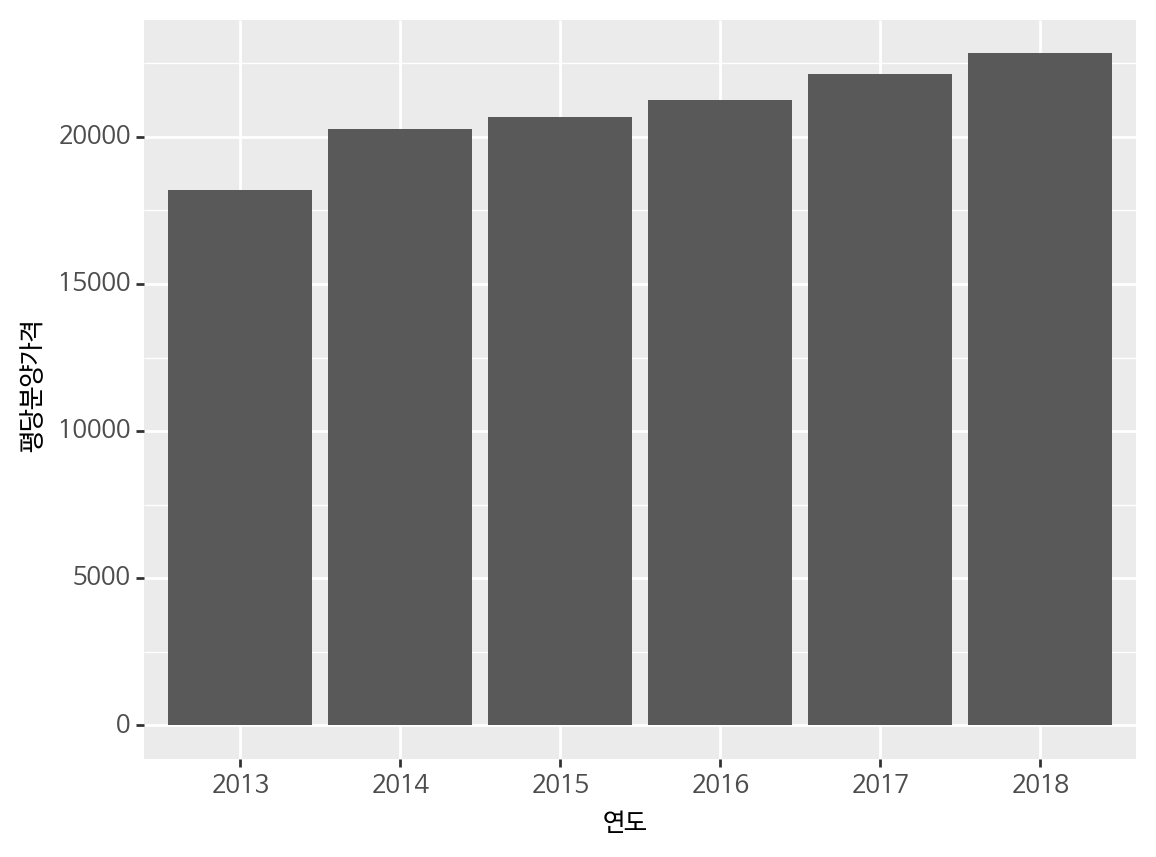

<ggplot: (8772008390229)>

In [197]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(fontproperties=font))
)

In [ ]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(fontproperties=font),
         figure_size=(12, 6))
)

In [ ]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(fontproperties=font))
)

In [ ]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(fontproperties=font))
)

In [ ]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(fontproperties=font),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)